<h2>Project 1: $k$-Nearest Neighbors</h2>
<p><cite><center>So many points,<br>
some near some far,<br>
- who are my true neighbors?</center></cite></p>

<h3>Introduction</h3>

<p>In this project, you will build a $k$-nearest neighbor classifier.</p>

<strong>How to submit:</strong> You can submit your code using the blue <strong>Submit</strong> button above. This button will send any code below surrounded by <strong>#&lt;GRADED&gt;</strong><strong>#&lt;/GRADED&gt;</strong> tags below to the autograder, which will then run several tests over your code. By clicking on the <strong>Details</strong> dropdown next to the Submit button, you will be able to view your submission report once the autograder has completed running. This submission report contains a summary of the tests you have failed or passed, as well as a log of any errors generated by your code when we ran it.

Note that this may take a while depending on how long your code takes to run! Once your code is submitted you may navigate away from the page as you desire -- the most recent submission report will always be available from the Details menu.

<p><strong>Evaluation:</strong> Your code will be autograded for technical
correctness and--on some assignments--speed. Please <em>do not</em> change the names of any provided functions or classes within the code, or you will wreak havoc on the autograder. Furthermore, <em>any code not surrounded by <strong>#&lt;GRADED&gt;</strong><strong>#&lt;/GRADED&gt;</strong> tags will not be run by the autograder</em>. However, the correctness of your implementation -- not the autograder's output -- will be the final judge of your score.  If necessary, we will review and grade assignments individually to ensure that you receive due credit for your work.

<p><strong>Academic Integrity:</strong> <em>This project should be completed in groups of one or two. Make sure you're in a Vocareum team if working with another student.</em> We will be checking your code against other submissions in the class for logical redundancy. If you copy someone else's code and submit it with minor changes, we will know. These cheat detectors are quite hard to fool, so please don't try. We trust you all to submit your team's own work only; <em>please</em> don't let us down. If you do, we will pursue the strongest consequences available to us.

<p><strong>Getting Help:</strong> You are not alone!  If you find yourself stuck  on something, contact the course staff for help.  Office hours, section, and the <a href="https://edstem.org/us/courses/19541/discussion/">Ed Discussion</a> are there for your support; please use them. We want these projects to be rewarding and instructional, not frustrating and demoralizing.  But, we don't know when or how to help unless you ask.  



**Libraries**: Before we get started we need to install a few libraries. You can do this by executing the following code.

In [1]:
#<GRADED>
import numpy as np
# functions that may be helpful
from scipy.stats import mode
import sys
#</GRADED>
%matplotlib notebook
#<GRADED>
import matplotlib
import matplotlib.pyplot as plt
from scipy.io import loadmat
import time
from helper_functions import loaddata, visualize_knn_2D, visualize_knn_images, plotfaces, visualize_knn_boundary
#</GRADED>

print('You\'re running python %s' % sys.version.split(' ')[0])

You're running python 3.7.6


<h3> k-Nearest Neighbors implementation in Python </h3>

<p>Our goal towards a $k$NN classifier is to build a classifier for face recognition. 
</p>

**Data:** We first obtain some data for testing your code. The data resides in the files <code>faces.mat</code> which hold the dataset for further experiments.

Here, <b>xTr</b> are the training vectors with labels <b>yTr</b> and <b>xTe</b> are the testing vectors with labels <b>yTe</b>. 
As a reminder, to predict the label or class of an image in <b>xTe</b>, we will look for the <i>k</i>-nearest neighbors in <b>xTr</b> and predict a label based on their labels in <b>yTr</b>. For evaluation, we will compare these labels against the true labels provided in <b>yTe</b>.</p>

<h4> Visualizing data</h4>

Let us take a look at our data. The following script will take the first 10 training images from the face data set and visualize them.

<IPython.core.display.Javascript object>


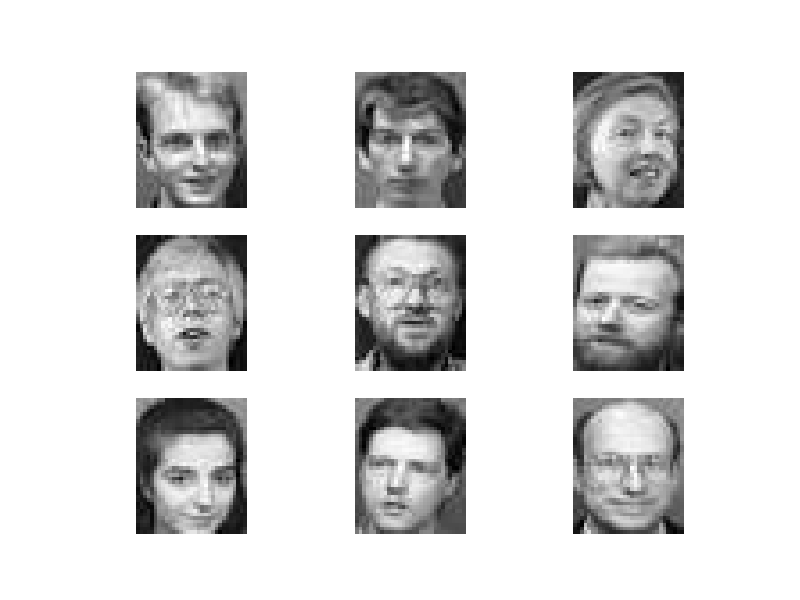

E:\Cornell MEng\Intro to Machine Learning (CS5780)\Starter Codes CS5780\KNN\startercode.0\helper_functions.py:116: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(m,m,i+1)


In [2]:
xTr,yTr,xTe,yTe=loaddata("faces.mat")

plt.figure()
plotfaces(xTr[:9, :])


<h4> Implementation </h4>
<p> The following questions will ask you to finish these functions in a pre-defined order. <br></p>

<p>(a) Implement the function  <b><code>l2distance</code></b>. You may use your own code(s) from the previous project.</p>


In [4]:
#<GRADED>
def l2distance(X,Z=None):
    """
    function D=l2distance(X,Z)
    
    Computes the Euclidean distance matrix.
    Syntax:
    D=l2distance(X,Z)
    Input:
    X: nxd data matrix with n vectors (rows) of dimensionality d
    Z: mxd data matrix with m vectors (rows) of dimensionality d
    
    Output:
    Matrix D of size nxm
    D(i,j) is the Euclidean distance of X(i,:) and Z(j,:)
    
    call with only one input:
    l2distance(X)=l2distance(X,X)
    """

    if Z is None:
        Z=X;

    n,d1=X.shape
    m,d2=Z.shape
    assert (d1==d2), "Dimensions of input vectors must match!"
    # Your code goes here ..

    #raise NotImplementedError('Your code goes here!')
    X_diag = np.diag(np.dot(X,X.T))
    Z_diag = np.diag(np.dot(Z,Z.T))
    #reshape to fit specifics of S and R
    S = X_diag.reshape((n,1))*np.ones((1,m))
    R = Z_diag*np.ones((n,1))
    G = np.dot(X,Z.T)
    D = S + R - 2*G
    D = np.sqrt(D)
    return D
    # ... until here
#</GRADED>


<p>(b) Implement the function <b><code>findknn</code></b>, which should find the $k$ nearest neighbors of a set of vectors within a given training data set. Break ties arbitrarily. The call of 
<pre>
 [I,D]=findknn(xTr,xTe,k);
</pre> 
should result in two matrices $I$ and $D$, both of dimensions $k\times n$, where $n$ is the number of input vectors in <code>xTe</code>. The matrix $I(i,j)$ is the index of the $i^{th}$ nearest neighbor of the vector $xTe(j,:)$. 
So, for example, if we set <code>i=I(1,3)</code>, then <code>xTr(i,:)</code> is the first nearest neighbor of vector <code>xTe(3,:)</code>. The second matrix $D$ returns the corresponding distances. So $D(i,j)$ is the distance of $xTe(j,:)$ to its $i^{th}$ nearest neighbor.
</p>

In [7]:
#<GRADED>
def findknn(xTr,xTe,k):
    """
    function [indices,dists]=findknn(xTr,xTe,k);
    
    Finds the k nearest neighbors of xTe in xTr.
    
    Input:
    xTr = nxd input matrix with n row-vectors of dimensionality d
    xTe = mxd input matrix with m row-vectors of dimensionality d
    k = number of nearest neighbors to be found
    
    Output:
    indices = kxm matrix, where indices(i,j) is the i^th nearest neighbor of xTe(j,:)
    dists = Euclidean distances to the respective nearest neighbors
    """
    # Enter your code here
    #raise NotImplementedError('Your code goes here!')
    
    #index matrix
    
    #Find the distance matrix between xTe and xTr
    
    D = l2distance(xTr, xTe)
    indices = np.argsort(D, axis = 0)[:k,:]
    dists = np.sort(D,axis=0)[:k,:]
    #print(dists.shape)
    #indices, dists = None, None

    return indices, dists
    # until here

#</GRADED>

<p> The following demo samples random points in 2D. If your findknn  function is correctly implemented, you should be able to click anywhere on the plot to add a test point. The function should then draw direct connections from your test point to the k  nearest neighbors. Verify manually if your code is correct.
</p>

<IPython.core.display.Javascript object>


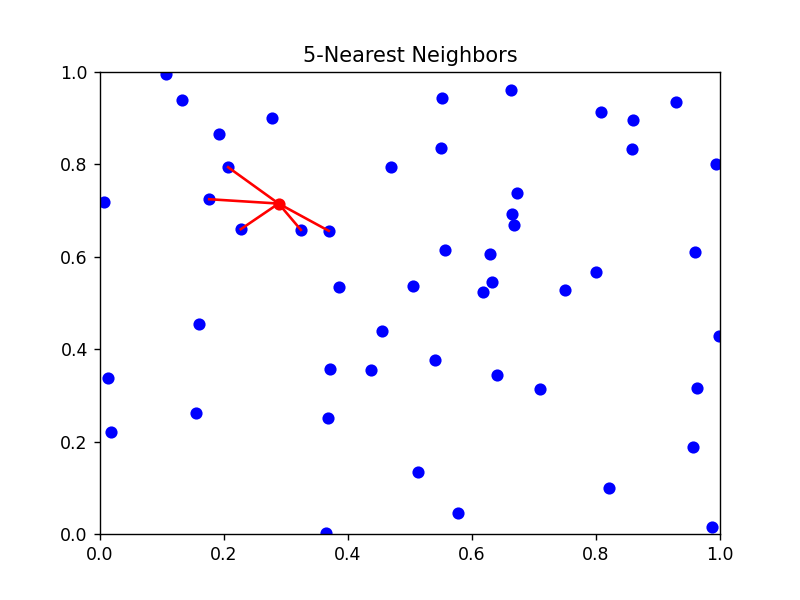

In [8]:
visualize_knn_2D(findknn)

We can visualize the k=3 nearest training neighbors of some of the test points (Click on the image to cycle through different test points). 

<IPython.core.display.Javascript object>


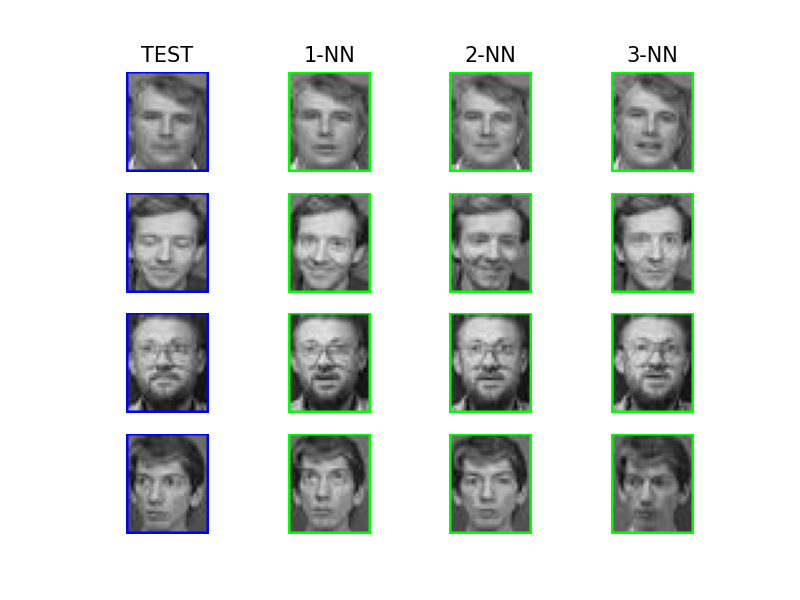

Click on the images above, to cycle through the test images.


In [9]:
visualize_knn_images(findknn, imageType='faces')

<p>(c) The function <b><code>analyze</code></b> should compute various metrics to evaluate a classifier. The call of
<pre>
  result=analyze(kind,truth,preds);
</pre>
should output the <b>accuracy</b> or <b>absolute loss</b> in variable <code>result</code>. The type of output required can be specified in the input argument <code>kind</code> as <code>"abs"</code> or <code>"acc"</code>. The input variables <code>truth</code> and <code>pred</code> should contain vectors of true and predicted labels respectively.
For example, the call
<pre>
>> analyze('acc',[1 2 1 2],[1 2 1 1])
</pre>
should return an accuracy of 0.75. Here, the true labels are 1,2,1,2 and the predicted labels are 1,2,1,1. So the first three examples are classified correctly, and the last one is wrong --- 75% accuracy.
<pre>
>> analyze('abs',[1 2 1 2],[1 2 1 1])
</pre>
should return sum (abs ([1 2 1 2] - [1 2 1 1]))/4 = 0.25. Here, the true labels are 1,2,1,2 and the predicted labels are 1,2,1,1. So the first three examples are classified correctly, and the last one is wrong --- 25% loss.
</p>



In [10]:
#<GRADED>
def analyze(kind,truth,preds):
    """
    function output=analyze(kind,truth,preds)         
    Analyses the accuracy of a prediction
    Input:
    kind=
        'acc' accuracy, or 
        'abs' absolute loss
    (other values of 'kind' will follow later)
    """
    
    truth = truth.flatten()
    preds = preds.flatten()
    
    if kind == 'abs':
        # compute the absolute difference between truth and predictions
        #raise NotImplementedError('Your code goes here!')
        #import pdb; pdb.set_trace()
        output = sum(abs(truth - preds))/len(truth)
    elif kind == 'acc':
        #raise NotImplementedError('Your code goes here!')
        
        #import pdb; pdb.set_trace()
        
        output = (len(truth) - len(np.where((truth - preds)>0)[0]))/len(truth)
    
    return output

#</GRADED>


<p>(d) Implement the function <b><code>knnclassifier</code></b>, which should perform $k$ nearest neighbor classification on a given test data set. Break ties arbitrarily. The call <pre>preds=knnclassifier(xTr,yTr,xTe,k)</pre>
should output the predictions for the data in <code>xTe</code> i.e. <code>preds[i]</code> will contain the prediction for <code>xTe[i,:]</code>.</p>

In [11]:
#<GRADED>
        
def knnclassifier(xTr,yTr,xTe,k):
    """
    function preds=knnclassifier(xTr,yTr,xTe,k);
    
    k-nn classifier 
    
    Input:
    xTr = nxd input matrix with n row-vectors of dimensionality d
    xTe = mxd input matrix with m row-vectors of dimensionality d
    k = number of nearest neighbors to be found
    
    Output:
    
    preds = predicted labels, ie preds(i) is the predicted label of xTe(i,:)
    """
    # fix array shapes
    yTr = yTr.flatten()
    I,D = findknn(xTr, xTe,k)
    preds = mode(yTr[I], axis = 0).mode[0]
    #print(preds)
    # Your code goes here
    #raise NotImplementedError('Your code goes here!')
    
    return preds

#</GRADED>

<p>You can compute the actual classification error on the test set by calling
<pre>
>> analyze("acc",yTe,knnclassifier(xTr,yTr,xTe,3))
</pre></p>

<p>(e) This script runs the $k$-nearest neighbor classifier over the faces data set. The faces data set has $40$ classes. What classification accuracy would you expect from a random classifier?</p>

In [12]:
print("Face Recognition: (1-nn)")
xTr,yTr,xTe,yTe=loaddata("faces.mat") # load the data
t0 = time.time()
preds = knnclassifier(xTr,yTr,xTe,1)
result=analyze("acc",yTe,preds)
t1 = time.time()
print("You obtained %.2f%% classification acccuracy in %.4f seconds\n" % (result*100.0,t1-t0))

Face Recognition: (1-nn)
You obtained 95.83% classification acccuracy in 0.0154 seconds



<p>(f) (optional) Sometimes a $k$-NN classifier can result in a tie, when the majority vote is not clearly defined. Can you improve your accuracy by falling back onto $k$-NN with lower $k$ in such a case?</p>


<h3> k-NN Boundary Visualization </h3>
<p> To help give you a visual understanding of how the k-NN boundary is affected by $k$ and the specific dataset, feel free to play around with the visualization below. </p>

**Instructions:**
Run the cell below.
Click anywhere in the graph to add a negative class point.
Hold down 'p' key and click anywhere in the graph to add a positive class point.
To increase $k$, hold down 'h' key and click anywhere in the graph.


<IPython.core.display.Javascript object>


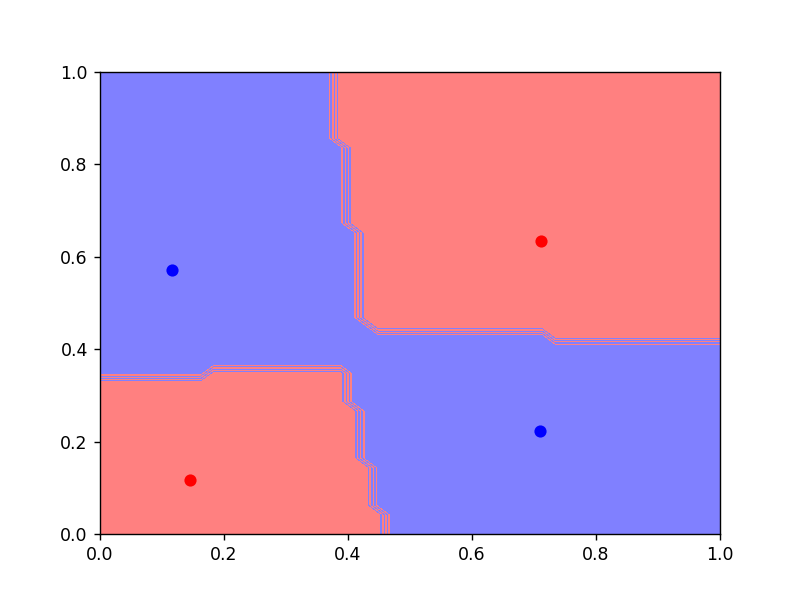

In [13]:
%matplotlib notebook
visualize_knn_boundary(knnclassifier)